In [ ]:
!pip install tflite-model-maker==0.3.*

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 616 kB 7.2 MB/s 
     |████████████████████████████████| 87 kB 6.9 MB/s 
     |████████████████████████████████| 596 kB 34.2 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 
     |████████████████████████████████| 128 kB 50.7 MB/s 
     |████████████████████████████████| 42.5 MB 1.2 MB/s 
     |████████████████████████████████| 3.4 MB 24.9 MB/s 
     |████████████████████████████████| 238 kB 45.5 MB/s 
     |████████████████████████████████| 840 kB 48.6 MB/s 
     |████████████████████████████████| 1.3 MB 44.1 MB/s 
     |████████████████████████████████| 1.1 MB 48.0 MB/s 
     |████████████████████████████████| 25.3 MB 82.1 MB/s 
     |████████████████████████████████| 352 kB 37.8 MB/s 
     |████████████████████████████████| 99 kB 9.5 MB/s 
     |████████████████████████████████| 77 kB 224 kB/s 
     |████████████████████████████████|

In [ ]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')


tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

ValueError: ignored

In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.7 MB 17 kB/s 
     |████████████████████████████████| 2.9 MB 36.4 MB/s 
     |████████████████████████████████| 3.8 MB 38.6 MB/s 
     |████████████████████████████████| 132 kB 45.6 MB/s 
     |████████████████████████████████| 14.8 MB 37.5 MB/s 
     |████████████████████████████████| 462 kB 47.9 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68724 sha256=dd1161077e7303c452dd7100d82253461b98d49d1e20076302e069bb15458058
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: n

In [ ]:
spec=object_detector.EfficientDetLite0Spec()


NameError: ignored

In [1]:
import tensorflow as tf
import os

print(os.getcwd())

from google.colab import drive
print(drive)

drive.mount('/content/drive', force_remount=True)


/content
<module 'google.colab.drive' from '/usr/local/lib/python3.7/dist-packages/google/colab/drive.py'>
Mounted at /content/drive


In [ ]:
# label_map={1:'Green Traffic Light', 2:'Person', 3:'Red Traffic Light', 4:'Stop Sign'}

train_data=object_detector.DataLoader.from_pascal_voc(images_dir='/content/drive/MyDrive/training_demo/images/train', annotations_dir='/content/drive/MyDrive/training_demo/images/train', label_map=label_map)
validation_data=object_detector.DataLoader.from_pascal_voc(images_dir='/content/drive/MyDrive/training_demo/images/test', annotations_dir='/content/drive/MyDrive/training_demo/images/test', label_map=label_map)


In [ ]:
model = object_detector.create(train_data=train_data, 
                               model_spec=spec,
                               validation_data=validation_data, 
                               epochs=60, 
                               batch_size=20, 
                               train_whole_model=True)

Epoch 1/60
8/8 [==============================] - 143s 13s/step - det_loss: 1.7780 - cls_loss: 1.1256 - box_loss: 0.0130 - reg_l2_loss: 0.0633 - loss: 1.8414 - learning_rate: 0.0163 - gradient_norm: 0.7829 - val_det_loss: 1.6634 - val_cls_loss: 1.0685 - val_box_loss: 0.0119 - val_reg_l2_loss: 0.0633 - val_loss: 1.7268
Epoch 2/60
8/8 [==============================] - 96s 12s/step - det_loss: 1.5364 - cls_loss: 0.9534 - box_loss: 0.0117 - reg_l2_loss: 0.0633 - loss: 1.5997 - learning_rate: 0.0250 - gradient_norm: 0.9675 - val_det_loss: 1.3923 - val_cls_loss: 0.8685 - val_box_loss: 0.0105 - val_reg_l2_loss: 0.0634 - val_loss: 1.4556
Epoch 3/60
8/8 [==============================] - 95s 12s/step - det_loss: 1.1847 - cls_loss: 0.7006 - box_loss: 0.0097 - reg_l2_loss: 0.0634 - loss: 1.2480 - learning_rate: 0.0249 - gradient_norm: 1.5977 - val_det_loss: 1.5052 - val_cls_loss: 1.0643 - val_box_loss: 0.0088 - val_reg_l2_loss: 0.0634 - val_loss: 1.5686
Epoch 4/60
8/8 [==========================

In [ ]:
test_data=object_detector.DataLoader.from_pascal_voc(images_dir='/content/drive/MyDrive/training_demo/images/validation', annotations_dir='/content/drive/MyDrive/training_demo/images/validation', label_map=label_map)


In [ ]:
model.evaluate(test_data)

1/1 [==============================] - 13s 13s/step



{'AP': 0.5596958,
 'AP50': 0.94831276,
 'AP75': 0.57642025,
 'AP_/Green Traffic Light': 0.49250156,
 'AP_/Person': 0.55439883,
 'AP_/Red Traffic Light': 0.59953994,
 'AP_/Stop Sign': 0.59234273,
 'APl': 0.67649335,
 'APm': 0.428554,
 'APs': 0.05049505,
 'ARl': 0.728581,
 'ARm': 0.5348861,
 'ARmax1': 0.46577284,
 'ARmax10': 0.64944017,
 'ARmax100': 0.6536537,
 'ARs': 0.05}

In [ ]:
TFLITE_FILENAME = 'efficientdet-lite-lego.tflite'
LABELS_FILENAME = 'lego-labels.txt'

model.export(export_dir='/content/drive/MyDrive/training_demo/tflite-models/test3', tflite_filename=TFLITE_FILENAME, label_filename=LABELS_FILENAME,
             export_format=[ExportFormat.TFLITE, ExportFormat.LABEL])

In [ ]:
model.evaluate_tflite('/content/drive/MyDrive/training_demo/tflite-models/test3/efficientdet-lite-lego.tflite', test_data)

30/30 [==============================] - 87s 3s/step



{'AP': 0.5049059,
 'AP50': 0.8706392,
 'AP75': 0.518744,
 'AP_/Green Traffic Light': 0.49160218,
 'AP_/Person': 0.5433221,
 'AP_/Red Traffic Light': 0.3910891,
 'AP_/Stop Sign': 0.5936102,
 'APl': 0.6469277,
 'APm': 0.38010693,
 'APs': 0.025247525,
 'ARl': 0.67483264,
 'ARm': 0.46679607,
 'ARmax1': 0.39987648,
 'ARmax10': 0.568644,
 'ARmax100': 0.5694867,
 'ARs': 0.05}

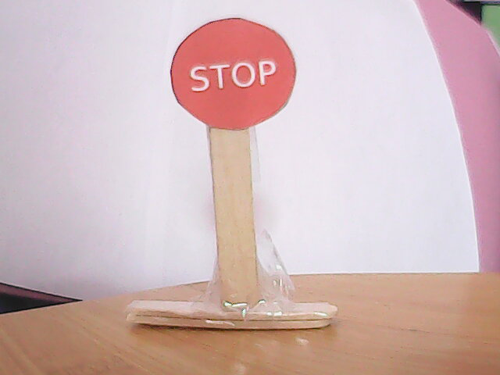

In [4]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import numpy as np

import tflite_runtime.interpreter as tflite 
from pycoral.adapters import common
from pycoral.adapters import detect
from pycoral.utils.dataset import read_label_file

def draw_objects(draw, objs, scale_factor, labels):
  """Draws the bounding box and label for each object."""
  COLORS = np.random.randint(0, 255, size=(len(labels), 3), dtype=np.uint8)
  for obj in objs:
    bbox = obj.bbox
    color = tuple(int(c) for c in COLORS[obj.id])
    draw.rectangle([(bbox.xmin * scale_factor, bbox.ymin * scale_factor),
                    (bbox.xmax * scale_factor, bbox.ymax * scale_factor)],
                   outline=color, width=3)
    font = ImageFont.truetype("LiberationSans-Regular.ttf", size=15)
    draw.text((bbox.xmin * scale_factor + 4, bbox.ymin * scale_factor + 4),
              '%s\n%.2f' % (labels.get(obj.id, obj.id), obj.score),
              fill=color, font=font)

# Load the TF Lite model
# labels = read_label_file('/content/drive/MyDrive/training_demo/tflite-models/test/lego-labels.txt')
labels = {
    0: "unlabeled",
    1: "person",
    2: "bicycle",
    3: "car",
    4: "motorcycle",
    5: "airplane",
    6: "bus",
    7: "train",
    8: "truck",
    9: "boat",
    10: "traffic",
    11: "fire",
    12: "street",
    13: "stop",
    14: "parking",
    15: "bench",
    16: "bird",
    17: "cat",
    18: "dog",
    19: "horse",
    20: "sheep",
    21: "cow",
    22: "elephant",
    23: "bear",
    24: "zebra",
    25: "giraffe",
    26: "hat",
    27: "backpack",
    28: "umbrella",
    29: "shoe",
    30: "eye",
    31: "handbag",
    32: "tie",
    33: "suitcase",
    34: "frisbee",
    35: "skis",
    36: "snowboard",
    37: "sports",
    38: "kite",
    39: "baseball",
    40: "baseball",
    41: "skateboard",
    42: "surfboard",
    43: "tennis",
    44: "bottle",
    45: "plate",
    46: "wine",
    47: "cup",
    48: "fork",
    49: "knife",
    50: "spoon",
    51: "bowl",
    52: "banana",
    53: "apple",
    54: "sandwich",
    55: "orange",
    56: "broccoli",
    57: "carrot",
    58: "hot",
    59: "pizza",
    60: "donut",
    61: "cake",
    62: "chair",
    63: "couch",
    64: "potted",
    65: "bed",
    66: "mirror",
    67: "dining",
    68: "window",
    69: "desk",
    70: "toilet",
    71: "door",
    72: "tv",
    73: "laptop",
    74: "mouse",
    75: "remote",
    76: "keyboard",
    77: "cell",
    78: "microwave",
    79: "oven",
    80: "toaster",
    81: "sink",
    82: "refrigerator",
    83: "blender",
    84: "book",
    85: "clock",
    86: "vase",
    87: "scissors",
    88: "teddy",
    89: "hair",
    90: "toothbrush",
    91: "hair",
    92: "banner",
    93: "blanket",
    94: "branch",
    95: "bridge",
    96: "building",
    97: "bush",
    98: "cabinet",
    99: "cage",
    100: "cardboard",
    101: "carpet",
    102: "ceiling",
    103: "ceiling",
    104: "cloth",
    105: "clothes",
    106: "clouds",
    107: "counter",
    108: "cupboard",
    109: "curtain",
    110: "desk",
    111: "dirt",
    112: "door",
    113: "fence",
    114: "floor",
    115: "floor",
    116: "floor",
    117: "floor",
    118: "floor",
    119: "flower",
    120: "fog",
    121: "food",
    122: "fruit",
    123: "furniture",
    124: "grass",
    125: "gravel",
    126: "ground",
    127: "hill",
    128: "house",
    129: "leaves",
    130: "light",
    131: "mat",
    132: "metal",
    133: "mirror",
    134: "moss",
    135: "mountain",
    136: "mud",
    137: "napkin",
    138: "net",
    139: "paper",
    140: "pavement",
    141: "pillow",
    142: "plant",
    143: "plastic",
    144: "platform",
    145: "playingfield",
    146: "railing",
    147: "railroad",
    148: "river",
    149: "road",
    150: "rock",
    151: "roof",
    152: "rug",
    153: "salad",
    154: "sand",
    155: "sea",
    156: "shelf",
    157: "sky",
    158: "skyscraper",
    159: "snow",
    160: "solid",
    161: "stairs",
    162: "stone",
    163: "straw",
    164: "structural",
    165: "table",
    166: "tent",
    167: "textile",
    168: "towel",
    169: "tree",
    170: "vegetable",
    171: "wall",
    172: "wall",
    173: "wall",
    174: "wall",
    175: "wall",
    176: "wall",
    177: "wall",
    178: "water",
    179: "waterdrops",
    180: "window",
    181: "window",
    182: "wood"
}
interpreter = tflite.Interpreter('/content/drive/MyDrive/training_demo/tflite-models/test/efficientdet-lite-lego.tflite')
interpreter.allocate_tensors()

INPUT_IMAGE='/content/drive/MyDrive/training_demo/images/test1/Newest_27.jpg'

# Resize the image for input
image = Image.open(INPUT_IMAGE)
_, scale = common.set_resized_input(
    interpreter, image.size, lambda size: image.resize(size, Image.ANTIALIAS))

# Run inference
interpreter.invoke()
objs = detect.get_objects(interpreter, score_threshold=0.4, image_scale=scale)

# Resize again to a reasonable size for display
display_width = 500
scale_factor = display_width / image.width
height_ratio = image.height / image.width
image = image.resize((display_width, int(display_width * height_ratio)))
draw_objects(ImageDraw.Draw(image), objs, scale_factor, labels)
image

In [2]:
! python3 -m pip install --extra-index-url https://google-coral.github.io/py-repo/ pycoral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://google-coral.github.io/py-repo/
     |████████████████████████████████| 373 kB 5.2 MB/s 
     |████████████████████████████████| 1.5 MB 45.1 MB/s 


In [ ]:
! curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

! echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list

! sudo apt-get update

! sudo apt-get install edgetpu-compiler

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  87482      0 --:--:-- --:--:-- --:--:-- 87482
OK
deb https://packages.cloud.google.com/apt coral-edgetpu-stable main
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://packages.cloud.google.com/apt coral-edgetpu-stable InRelease [6,722 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://packages.cloud.google.com/apt coral-edgetpu-stable/main amd64 Packages [2,317 B]
Hit:8 http://archive.ubuntu.com/ubuntu bio

In [ ]:
NUMBER_OF_TPUS =  1

!edgetpu_compiler /content/drive/MyDrive/training_demo/tflite-models/test2/efficientdet-lite-lego.tflite -o /content/drive/MyDrive/training_demo/tflite-models/test2 --num_segments=$NUMBER_OF_TPUS

Edge TPU Compiler version 16.0.384591198
Started a compilation timeout timer of 180 seconds.

Model compiled successfully in 3710 ms.

Input model: /content/drive/MyDrive/training_demo/tflite-models/test2/efficientdet-lite-lego.tflite
Input size: 4.24MiB
Output model: /content/drive/MyDrive/training_demo/tflite-models/test2/efficientdet-lite-lego_edgetpu.tflite
Output size: 5.57MiB
On-chip memory used for caching model parameters: 4.21MiB
On-chip memory remaining for caching model parameters: 3.29MiB
Off-chip memory used for streaming uncached model parameters: 0.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 267
Operation log: /content/drive/MyDrive/training_demo/tflite-models/test2/efficientdet-lite-lego_edgetpu.log

Model successfully compiled but not all operations are supported by the Edge TPU. A percentage of the model will instead run on the CPU, which is slower. If possible, consider updating your model to use only operations supported by the Edge TPU. For deta